In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [61]:
xtest = pd.read_parquet("../data/xtest.parquet")
ytest = pd.read_parquet("../data/ytest.parquet")

In [62]:
test = pd.concat([xtest, ytest], axis=1)
# Generar columna predicción
prob_0 = ytest.value_counts()[0]/ ytest.value_counts().sum()
test['ypred'] = np.random.choice(2,len(test), p=[prob_0, 1-prob_0])
# Predeciremos que el valor que toma la variable 
# objetivo es siempre 0, ya que acertaremos más de un 
# 98% de las veces.


In [63]:
print("Classification Report")
print(classification_report(test['fatality'], test['ypred']))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    997197
           1       0.02      0.02      0.02     15456

    accuracy                           0.97   1012653
   macro avg       0.50      0.50      0.50   1012653
weighted avg       0.97      0.97      0.97   1012653



In [64]:
np.random.choice(np.arange(0,2), p=[0.5, 1-0.5])

0

In [65]:
recall_score(test['fatality'], test['ypred'])

0.015333850931677018

In [66]:
precision_score(test['fatality'], test['ypred'])

0.015238217707194754

In [67]:
accuracy_score(test['fatality'], test['ypred'])

0.9698465318327206

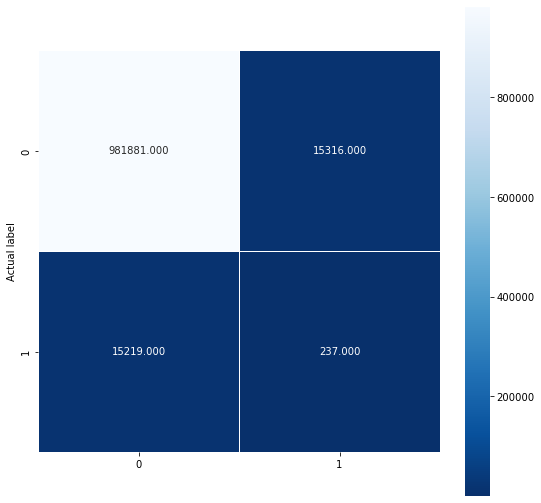

In [68]:
cm_gbt = confusion_matrix(test['fatality'], test['ypred'])

plt.figure(figsize=(9,9))
sns.heatmap(cm_gbt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');

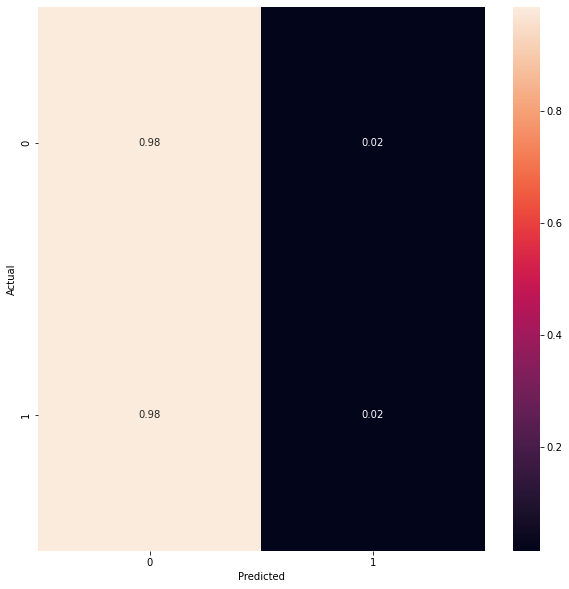

In [69]:
cm = confusion_matrix(test['fatality'], test['ypred'])
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)